In [1]:
import matplotlib.pyplot as plt
import numpy as np
import numpy.ma as ma
import seaborn as sns
from scipy.io import readsav

sns.set_style('darkgrid')
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

data = readsav('aztec_sim_data.sav')
print(np.shape(data.coadded_signal_map))
print(data.keys())
print(np.shape(data.phys_dec_map))
Y, X = np.meshgrid(data.phys_dec_map,data.phys_ra_map)
print(np.shape(data.kernel_mean))

(1436, 1811)
dict_keys(['phys_ra_map', 'coadded_signal_map', 'kernel_mean', 'phys_dec_map', 'coadded_weight_map'])
(1436,)
(1436, 1810)


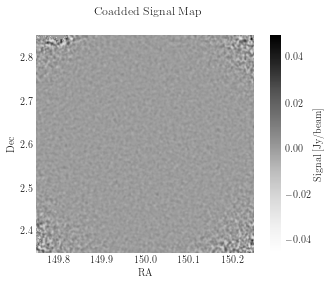

In [33]:
plt.pcolormesh(X, Y, data.coadded_signal_map.T, cmap='Greys')
plt.xlim(149.75, 150.25)
plt.ylim(2.35, 2.85)
plt.gca().set_aspect('equal')
plt.suptitle('Coadded Signal Map')
plt.xlabel('RA')
plt.ylabel('Dec')
plt.colorbar(label='Signal [Jy/beam]')
plt.show()

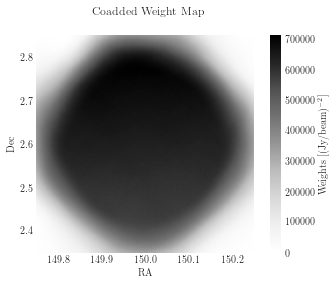

In [34]:
plt.pcolormesh(X, Y, data.coadded_weight_map.T, cmap='Greys')
plt.xlim(149.75, 150.25)
plt.ylim(2.35, 2.85)
plt.gca().set_aspect('equal')
plt.suptitle('Coadded Weight Map')
plt.xlabel('RA')
plt.ylabel('Dec')
plt.colorbar(label='Weights [(Jy/beam)$^{-2}$]')
plt.show()

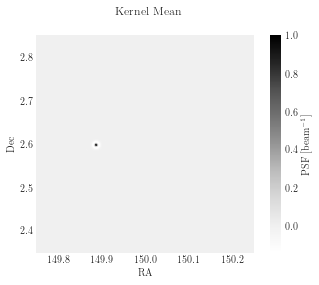

In [35]:
plt.pcolormesh(X, Y, data.kernel_mean.T, cmap='Greys')
plt.xlim(149.75, 150.25)
plt.ylim(2.35, 2.85)
plt.gca().set_aspect('equal')
plt.suptitle('Kernel Mean')
plt.xlabel('RA')
plt.ylabel('Dec')
plt.colorbar(label='PSF [beam$^{-1}$]')
plt.show()

In [28]:
masked_weights = ma.masked_less(data.coadded_weight_map[:, :-1], 0.0014**(-2.0))
masked_signal = ma.masked_array(data.coadded_signal_map[:, :-1], mask=masked_weights.mask)
masked_kernel_map = ma.masked_array(data.kernel_mean, mask=masked_weights.mask)
sn_map = masked_signal*np.sqrt(masked_weights)
sn_map[np.where(sn_map < 0.0)] = 0.0
hist_signal = masked_signal.compressed()

def make_gaussian(x_array, mean, amp, width, bg):
    return bg + amp*np.exp((-(x_array - mean)**2.0)/(2.0*(width**2.0)))

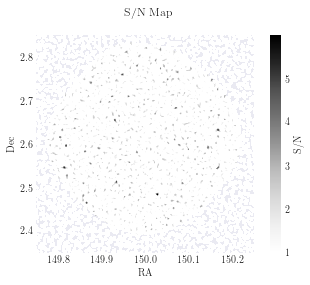

In [32]:
plt.pcolormesh(X, Y, sn_map.T, cmap='Greys', vmin=1.0, vmax=np.max(sn_map))
plt.suptitle('S/N Map')
plt.xlabel('RA')
plt.ylabel('Dec')
plt.colorbar(label='S/N')
plt.xlim(149.75, 150.25)
plt.ylim(2.35, 2.85)
plt.gca().set_aspect('equal')
plt.show()

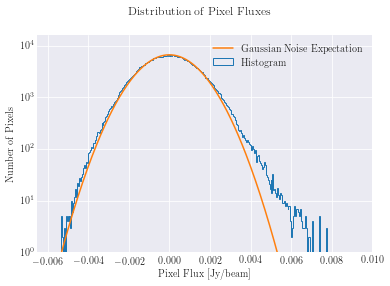

In [58]:
n, bins, _ = plt.hist(hist_signal, bins='auto', histtype='step', label='Histogram')
plt.gca().set_yscale('log')
plt.plot(bins,
         make_gaussian(bins,
                       0.0,
                       np.max(n),
                       1.0/np.mean(np.sqrt(masked_weights.compressed())),
                       0.0),
        label='Gaussian Noise Expectation')
plt.suptitle('Distribution of Pixel Fluxes')
plt.xlabel('Pixel Flux [Jy/beam]')
plt.ylabel('Number of Pixels')
plt.xlim(-0.0065, 0.010)
plt.ylim(1.0, 10.0**(1.1*np.log10(np.max(n))))
plt.legend()
plt.show()

In [55]:
sn_cut = ma.masked_outside(sn_map, 3.9, 4.1)
signal_cut = ma.masked_array(masked_signal, mask=sn_cut.mask)
print(signal_cut.mean(), signal_cut.std())

0.00504411866276 0.000167621601497
